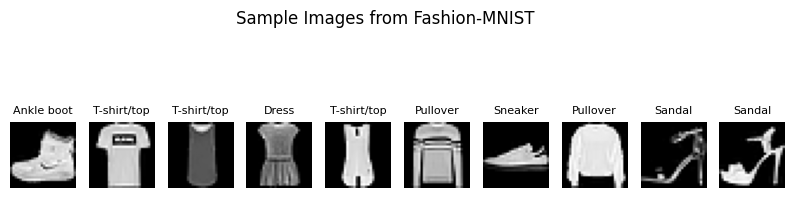

C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8225 - loss: 0.5065 - val_accuracy: 0.8582 - val_loss: 0.4015
Epoch 2/10
1688/1688 - 4s - 3ms/step - accuracy: 0.8611 - loss: 0.3858 - val_accuracy: 0.8607 - val_loss: 0.3828
Epoch 3/10
1688/1688 - 4s - 2ms/step - accuracy: 0.8740 - loss: 0.3453 - val_accuracy: 0.8673 - val_loss: 0.3763
Epoch 4/10
1688/1688 - 4s - 2ms/step - accuracy: 0.8812 - loss: 0.3202 - val_accuracy: 0.8713 - val_loss: 0.3419
Epoch 5/10
1688/1688 - 4s - 3ms/step - accuracy: 0.8886 - loss: 0.3013 - val_accuracy: 0.8810 - val_loss: 0.3366
Epoch 6/10
1688/1688 - 4s - 3ms/step - accuracy: 0.8924 - loss: 0.2853 - val_accuracy: 0.8833 - val_loss: 0.3252
Epoch 7/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8986 - loss: 0.2716 - val_accuracy: 0.8838 - val_loss: 0.3208
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9013 - loss: 0.2637 - val_accuracy: 0.8813 - val_loss: 0.3301
Epoch 9/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9065 - loss: 0.2519 - val_accuracy: 0.8838 - 

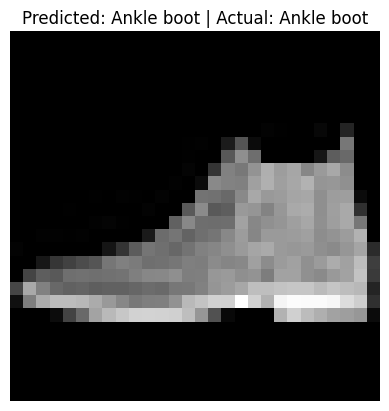

In [ ]:
# ===============================================================
#  Fashion-MNIST Classification using Deep Neural Network
# ===============================================================


# Import necessary libraries
# -----------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# load and preprocess the dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to range [0,1] for faster and more stable training
X_train = X_train / 255.0
X_test = X_test / 255.0

# Class labels for visualization
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualize some samples

plt.figure(figsize=(10, 3)) #Creates a blank figure of width 10 and height 3 inches — this sets how big the entire grid of images will appear.
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
    plt.title(class_names[y_train[i]], fontsize=8)
plt.suptitle("Sample Images from Fashion-MNIST", fontsize=12)
plt.show()

# Build the neural network model
# -----------------------------
# Sequential API: layer-by-layer construction
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Converts 2D image -> 1D vector (28*28=784 inputs)
    layers.Dense(128, activation='relu'),     # Hidden layer (128 neurons) with ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer (10 neurons = 10 classes)
])

# Compile the model
# -----------------------------
# - Adam optimizer adjusts learning rate automatically
# - Cross-entropy is the correct loss for multi-class classification
# - Accuracy metric shows performance
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#  Train the model
# -----------------------------
# 10% of data used for validation
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

#  Make predictions
# -----------------------------
predictions = model.predict(X_test)

# Display one sample prediction
index = 0
predicted_label = np.argmax(predictions[index])
true_label = y_test[index]

plt.imshow(X_test[index], cmap="gray")
plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[true_label]}")
plt.axis("off")
plt.show()
